# Nissen et al., 2023: Severe 21st-century OA in Antarctic MPAs
#
# script to save MPA mask on FESOM mesh as netcdf file
#
# note that some paths are hard-coded throughout the script

In [1]:
### modules
import sys
sys.path.append('/home/ollie/jhauck/py_fesom/modules/')
import os
import numpy as np
from scipy import stats
import skill_metrics as sm #module installed on ollie
import seawater as sw
import matplotlib
#matplotlib.use('Agg') #changing backend
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from time import localtime, gmtime, strftime
from scipy import signal
from annualmean import annualmean
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
from matplotlib import cm 
from load_mesh_data_new import load_mesh
from numba import njit
from math import sin, cos, sqrt, atan2, radians

In [2]:
# load mesh
meshpath = '/work/ollie/ncara/input/dgird_100/'
#mesh = pf.load_mesh(meshpath, get3d=True) # usepickle=True,

savepath = '/work/ollie/ncara/masks/transect_positions/'

abg_mesh = [50, 15, -90]
levelwise=1
rotated_grid=1
nlev_Setup = 98

mesh       = load_mesh(meshpath,abg=abg_mesh,get3d=True)             # Loading mesh, stores it in mesh.****  
mesh.zlevs = -mesh.zlevs                                            # Depth is made negative

lat_fesom = mesh.y2
lon_fesom = mesh.x2


# convert to 0-360
ind_neg = np.where(lon_fesom<0)[0]
lon_fesom[ind_neg] = lon_fesom[ind_neg]+360


usepickle =  False
abg =  [50, 15, -90]
no pickle
Load 2d part of the grid in 6 second(s)
Load 3d part of the grid in 11 seconds


In [3]:

test_plot = False
if test_plot:
    
    # regridded
    fig7= plt.figure(num=18, figsize=(5,4), dpi=dpicnt, facecolor='w', edgecolor='k')
    plt.subplot(1,2,1)
    map = Basemap(projection='spstere',boundinglat=-30,lon_0=-180,resolution='l')
    map.drawcoastlines()
    map.drawcountries()
    map.drawmapboundary(fill_color='0.7')
    x, y = map(mesh.x2, mesh.y2)
    mm=plt.tricontourf(x, y, elem_no_nan[::],mask_plot,cmap=cm.Spectral_r,\
                                   levels = levels1,extend='max') #,vmin=-4, vmax=4) #extend='both'
    cbar = plt.colorbar(orientation='horizontal',fraction=0.075, pad=0.03,shrink=0.8)# ,ticks=cticks)
    cbar.set_label('')
    plt.annotate('FESOM', xy=(0.05,0.05), xycoords='axes fraction',color='white')
    plt.show()#block=True)


In [4]:
#------
# FUNCTIONS
#------

def transform_lon_coord(data):
    # change lon coordinate in 2D array from 0-360 to -180:180
    # for 2D arrays: assume lon coordinate to be the 2nd dimension  
    if len(data.shape)==2:
        data_transformed          = np.empty_like(data)
        try:
            #data_transformed[0:180,:] = data[180:,:]
            #data_transformed[180:,:]  = data[0:180,:] 
            data_transformed[:,0:180] = data[:,180:]
            data_transformed[:,180:]  = data[:,0:180]   
        except:
            data_transformed[:,0:181] = data[:,180:]
            data_transformed[:,180:]  = data[:,0:181]  
    elif len(data.shape)==1:
        data_transformed          = np.empty_like(data)
        try:
            data_transformed[0:180] = data[180:]
            data_transformed[180:]  = data[0:180]
        except:
            data_transformed[0:181] = data[180:]
            data_transformed[180:]  = data[0:181]
    return data_transformed

@njit
def get_closest_grid_point(lon_point, lat_point, lon2, lat2):  
    # in all nodes in mesh, return the index of the closest node to lon_point/lat_point
    # lon2 & lat2 are the locations in the new mesh (to be redistributed to)
    # lon2 & lat2 should be in radians
    # numpy needs to be imported outside the function
    
    #from math import sin, cos, sqrt, atan2, radians
    #import numpy as np
    # approximate radius of earth in km
    R = 6373.0
    
    #lat2 = radians(mesh.y2) # all positions in mesh
    #lon2 = radians(mesh.x2)
    #lat2 = [radians(x) for x in mesh.y2]
    #lon2 = [radians(x) for x in mesh.x2]
    lat1 = radians(lat_point)
    lon1 = radians(lon_point)
    bb1 = cos(lat1)
    
    all_distances = np.zeros(len(lon2))
    for i in range(0,len(lon2)):
        dlon = lon2[i] - lon1
        dlat = lat2[i] - lat1
        a = sin(dlat / 2)**2 + bb1 * cos(lat2[i]) * sin(dlon / 2)**2
        all_distances[i] = 2*R*atan2(sqrt(a), sqrt(1 - a)) # to speed things up, omit constant factors here!
        #all_distances[i] = 2*R*atan2(sqrt(a), sqrt(1 - a)) # correct distance
        #del dlon, dlat, a
    index_closest_node = np.argmin(all_distances)
    distance_closest_node = np.min(all_distances)

    return index_closest_node, distance_closest_node

Process  WeddellSea
Min/Max lon_reccap2: 0.5 359.5
Min/Max lon_feosm: 0.00363872536355 359.996672316
Min/Max lon_reccap: 0.5 359.5
Processed 0/72411


/global/AWIsoft/intel/2018/intelpython2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in less_equal
/global/AWIsoft/intel/2018/intelpython2/lib/python2.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in greater
/global/AWIsoft/intel/2018/intelpython2/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less_equal
/global/AWIsoft/intel/2018/intelpython2/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in greater


Processed 5000/72411
Processed 10000/72411
Processed 15000/72411
Processed 20000/72411
Processed 25000/72411
Processed 30000/72411
Processed 35000/72411
Processed 40000/72411
Processed 45000/72411
Processed 50000/72411
Processed 55000/72411
Processed 60000/72411
Processed 65000/72411
Processed 70000/72411
1.0 1.0
1.0 1.0
7456 nodes of mesh are in mask...
Mask outside of SO: (15074,)


/global/AWIsoft/intel/2018/intelpython2/lib/python2.7/site-packages/ipykernel_launcher.py:83: UserWarning: Warning: converting a masked element to nan.


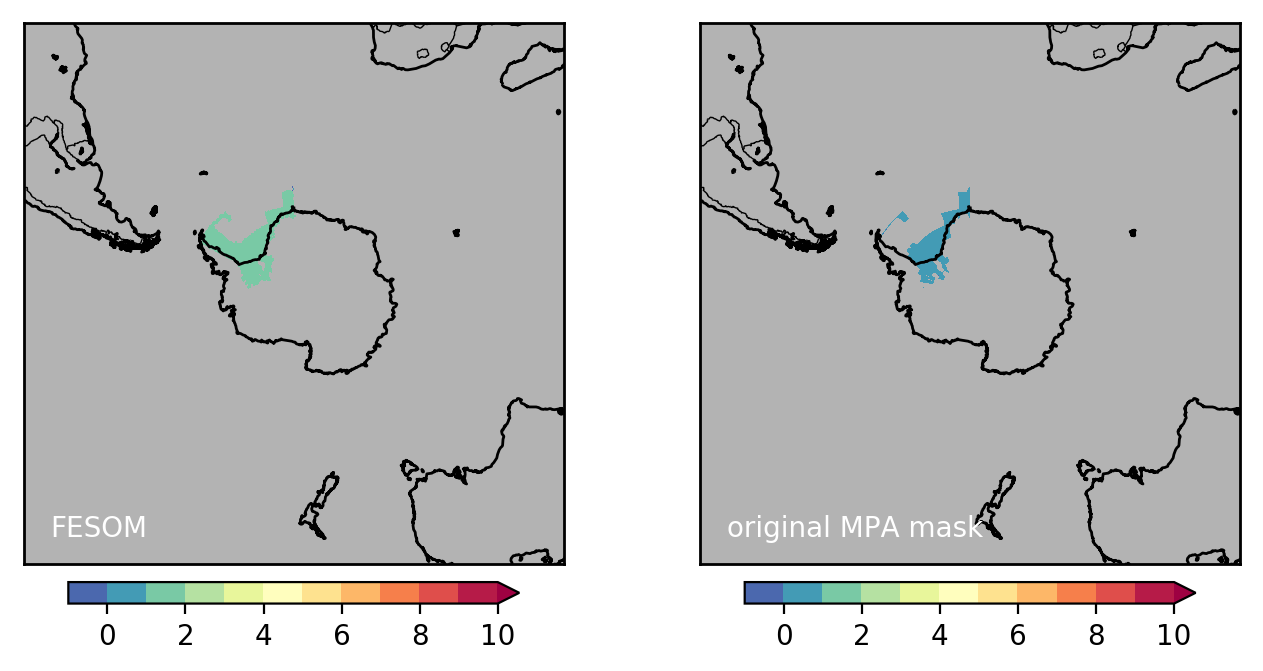

File /work/ollie/ncara/masks/masks_MPAs/MPA_mask_WeddellSea_fesom_mesh_COARZE.nc exists already, overwrite
done


In [11]:
#-----
# load mask etc
#-----

mask_list = ['RossSea','WeddellSea','AntarcticPeninsula','Orkney',\
             'East_Antarctica_1','East_Antarctica_2','East_Antarctica_3']
save_netcdf = True
    
for rr in range(1,2):#,len(mask_list)):
    
    which_mask = mask_list[rr]
    print 'Process ',which_mask

    #----
    # read original mask etc
    #----
    
    # original mask
    path4b = '/work/ollie/ncara/masks/masks_MPAs/MPA_mask_'+which_mask+'_regular_mesh_1deg.nc' # lon is from -180:180
    f4b = Dataset(path4b)
    mask_reccap2 = np.squeeze(f4b.variables['mask_mpa'][:,:])
    mask_reccap2    = transform_lon_coord(mask_reccap2) # mask is on -180:180 grid, convert here
    f4b.close()
    #print mask_reccap2.shape

    # for lat,lon,land-sea mask
    path4 = '/work/ollie/ncara/RECCAPv2/reccap2ocean_regions.nc'
    f3 = Dataset(path4)
    seamask_reccap2 = f3.variables['seamask'][:,:]
    lat_reccap2  = np.squeeze(f3.variables['lat'][:])
    lon_reccap2  = np.squeeze(f3.variables['lon'][:]) # 0:360
    #lon_reccap2     = transform_lon_coord(lon_reccap2)

    ## convert to -180:180
    #ind_neg = np.where(lon_reccap2>180)[0]
    #lon_reccap2[ind_neg] = lon_reccap2[ind_neg]-360

    ind = np.where(lat_reccap2<=-59)[0]
    seamask_reccap2 = seamask_reccap2[ind,:]
    lat_reccap2 = lat_reccap2[ind]
    del ind
    f3.close()
    #print seamask_reccap2.shape
    #print lon_reccap2.shape

    print 'Min/Max lon_reccap2:',np.min(lon_reccap2),np.max(lon_reccap2)
    print 'Min/Max lon_feosm:',np.min(lon_fesom),np.max(lon_fesom)

    lon_reccap,lat_reccap = np.meshgrid(lon_reccap2,lat_reccap2)
    mask_reccap = mask_reccap2.ravel()
    seamask_reccap = seamask_reccap2.ravel()

    lon_reccap  = lon_reccap.ravel()
    lat_reccap  = lat_reccap.ravel()
    
    #------
    # kick out land-points (from landmask) in list of locations, so that
    # FESOM points are assigned the closest ocean point
    #------
    mask_reccap = mask_reccap[seamask_reccap==1]
    lon_reccap = lon_reccap[seamask_reccap==1]
    lat_reccap = lat_reccap[seamask_reccap==1]
    #print len(lon_reccap)
    print 'Min/Max lon_reccap:',np.min(lon_reccap),np.max(lon_reccap)

    lat_reccap_rad = [radians(x) for x in lat_reccap]
    lon_reccap_rad = [radians(x) for x in lon_reccap]

    #------
    # regrid to FESOM
    #------

    # go through fesom locations, find closest box in original mask and assign mask value
    mask_fesom_index = np.zeros(len(lon_fesom))
    mask_fesom       = np.zeros(len(lon_fesom))
    for ii in range(0,len(lon_fesom)):
        if np.mod(ii,5000)==0:
            print 'Processed '+str(ii)+'/'+str(len(lon_fesom))
        index_closest_node,distance_closest_node = get_closest_grid_point(lon_fesom[ii], lat_fesom[ii],\
                                                                      lon_reccap_rad, lat_reccap_rad)
        #if lon_fesom[ii]<-175:
        #    print index_closest_node,mask_reccap[index_closest_node]

        mask_fesom_index[ii] = index_closest_node
        mask_fesom[ii] = mask_reccap[index_closest_node]
        del index_closest_node,distance_closest_node

    print np.min(mask_reccap2),np.max(mask_reccap2)
    print np.nanmin(mask_fesom),np.nanmax(mask_fesom)

    ind = np.where(mask_fesom==1)[0]
    print(str(ind.shape[0])+' nodes of mesh are in mask...')
    
    #plt.plot(mesh.x2[ind], mesh.y2[ind],'ko')
    #plt.show()
    
    #------
    # plot mask on 1° mesh (original) and regridded to FESOM mesh
    #------
    
    elem_no_nan = mesh.elem[mesh.no_cyclic_elem,:]
    dpicnt = 200
    levels1 = range(-1,11)

    nan_mask=np.isnan(mask_fesom)
    mask_fesom[nan_mask]=-999
    #mask_fesom = transform_lon_coord(mask_fesom)

    lon_plot2=np.concatenate((lon_reccap2,np.full(1,lon_reccap2[0]))) 
    lon_plot,lat_plot = np.meshgrid(lon_plot2,lat_reccap2)
    # w/o this line, the contouring of the regions is incomplete
    #mask_reccap2[np.isnan(mask_reccap2)]=9
    nan_mask=np.isnan(mask_reccap2)
    mask_reccap2[nan_mask]=-999
    data_plot2 = mask_reccap2
    #data_plot2 = transform_lon_coord(mask_reccap2)
    # repeat first element at the end to get rid of grey line in plot
    b = np.zeros((31,360+1))
    b[:,:-1] = data_plot2
    b[:,-1] = data_plot2[:,0]
    data_plot = b
    del data_plot2,b,nan_mask,lon_plot2

    #----
    # mask data outside of the SO:
    indSO = np.where(lat_fesom>-59)[0]
    print 'Mask outside of SO:',indSO.shape
    mask_fesom = np.ma.masked_where(lat_fesom>-59,mask_fesom)
    mask_fesom[indSO]=-999
    #----
    
    if mask_list[rr] in ['WeddellSea']:
        # for the Weddell Sea, connect piece at WAP tip with southern piece
        ind = np.where((lat_fesom<=-64.0) & (lon_fesom<310) & (lon_fesom>298.5))[0]
        mask_fesom[ind]=1
        # correct piece that reaches into WAP
        ind = np.where((lat_fesom>-64.8) & (lon_fesom<300))[0]
        mask_fesom[ind]=-999
    
    # regridded
    fig7= plt.figure(num=18, figsize=(8,4), dpi=dpicnt, facecolor='w', edgecolor='k')
    plt.subplot(1,2,1)
    map = Basemap(projection='spstere',boundinglat=-30,lon_0=-180,resolution='l')
    map.drawcoastlines()
    map.drawcountries()
    map.drawmapboundary(fill_color='0.7')
    #lon_fesom2,lat_fesom2 = np.meshgrid(lon_fesom,lat_fesom)
    #x, y = map(lon_fesom,lat_fesom)
    #mesh       = load_mesh(meshpath,abg=[0,0,0])
    #x, y = map(mesh.x2, mesh.y2)
    x, y = map(lon_fesom, mesh.y2)
    mm=plt.tricontourf(x, y, elem_no_nan[::],mask_fesom,cmap=cm.Spectral_r,\
                                   levels = levels1,extend='max') #,vmin=-4, vmax=4) #extend='both'
    cbar = plt.colorbar(orientation='horizontal',fraction=0.075, pad=0.03,shrink=0.8)# ,ticks=cticks)
    cbar.set_label('')
    #mm2=plt.tricontour(x, y, elem_no_nan[::], mld_ratio, levels = [0.5],color='black')
    plt.annotate('FESOM', xy=(0.05,0.05), xycoords='axes fraction',color='white')
    #if save_plot:
    #    plt.savefig(savepath+'RECCAP_regions_regridded_to_FESOM.png',\
    #                            dpi = dpicnt, bbox_inches='tight')  
    #plt.show()#block=True)

    # original
    #fig7= plt.figure(num=18, figsize=(6,5), dpi=dpicnt, facecolor='w', edgecolor='k')
    plt.subplot(1,2,2)
    map = Basemap(projection='spstere',boundinglat=-30,lon_0=-180,resolution='l')
    map.drawcoastlines()
    map.drawcountries()
    map.drawmapboundary(fill_color='0.7')
    x, y = map(lon_plot, lat_plot)
    mm=plt.contourf(x, y, data_plot,cmap=cm.Spectral_r,\
                                   levels = levels1,extend='max') #,vmin=-4, vmax=4) #extend='both'
    cbar = plt.colorbar(orientation='horizontal',fraction=0.075, pad=0.03,shrink=0.8)# ,ticks=cticks)
    cbar.set_label('')
    plt.annotate('original MPA mask', xy=(0.05,0.05), xycoords='axes fraction',color='white')
    #if save_plot:
    #    plt.savefig(savepath+'RECCAP_regions_original_1deg_mesh.png',\
    #                            dpi = dpicnt, bbox_inches='tight')  
    plt.show()#block=True)


    #---------
    # SAVE SUBAREA AVERAGES AS NETCDF FILE
    #---------
    
    if save_netcdf: 
        # save to netcdf file

        saving_directory  = '/work/ollie/ncara/masks/masks_MPAs/' 
        netcdf_name       = 'MPA_mask_'+which_mask+'_fesom_mesh_COARZE.nc' 

        if save_netcdf: 
            # add a statement to only do the below if file does not yet exist.
            if not os.path.exists(saving_directory+netcdf_name):
                print 'Create file '+saving_directory+netcdf_name
                w_nc_fid = Dataset(saving_directory+netcdf_name, 'w', format='NETCDF4_CLASSIC')
                w_nc_fid.mesh = meshpath
                w_nc_fid.mask_source = path4b
                # create dimension & variable
                w_nc_fid.createDimension('nod2d', len(mesh.x2)) # number of subareas
                w_nc_var1 = w_nc_fid.createVariable('mask_fesom', 'f4',('nod2d'))
                w_nc_fid.close()
            else:
                print 'File '+saving_directory+netcdf_name+' exists already, overwrite'

        if save_netcdf: 
            w_nc_fid = Dataset(saving_directory+netcdf_name, 'r+', format='NETCDF4_CLASSIC')      # Create and open new netcdf file to write to
            w_nc_fid.variables['mask_fesom'][:] = mask_fesom
            #w_nc_fid.variables['lon'][:] = mesh.x2
            #w_nc_fid.variables['lat'][:] = mesh.y2
            w_nc_fid.close()  
        
    del path4b,data_plot,lon_plot,lat_plot
    print 'done'

In [ ]:

testing = True

if testing:
    
    mask_fesom2 = np.copy(mask_fesom)
    
    #----
    # mask data outside of the SO:
    indSO = np.where(lat_fesom>-59)[0]
    mask_fesom2[indSO]=-999
    #----
    
    ind = np.where((lat_fesom<=-64.5) & (lon_fesom<310) & (lon_fesom>300))[0]
    mask_fesom2[ind]=1
    
    # regridded
    fig7= plt.figure(num=18, figsize=(4,4), dpi=dpicnt, facecolor='w', edgecolor='k')
    map = Basemap(projection='spstere',boundinglat=-30,lon_0=-180,resolution='l')
    map.drawcoastlines()
    map.drawcountries()
    map.drawmapboundary(fill_color='0.7')
    #lon_fesom2,lat_fesom2 = np.meshgrid(lon_fesom,lat_fesom)
    #x, y = map(lon_fesom,lat_fesom)
    #mesh       = load_mesh(meshpath,abg=[0,0,0])
    #x, y = map(mesh.x2, mesh.y2)
    x, y = map(lon_fesom, mesh.y2)
    mm=plt.tricontourf(x, y, elem_no_nan[::],mask_fesom2,cmap=cm.Spectral_r,\
                                   levels = levels1,extend='max') #,vmin=-4, vmax=4) #extend='both'
    cbar = plt.colorbar(orientation='horizontal',fraction=0.075, pad=0.03,shrink=0.8)# ,ticks=cticks)
    cbar.set_label('')
    #mm2=plt.tricontour(x, y, elem_no_nan[::], mld_ratio, levels = [0.5],color='black')
    plt.annotate('FESOM', xy=(0.05,0.05), xycoords='axes fraction',color='white')
    #if save_plot:
    #    plt.savefig(savepath+'RECCAP_regions_regridded_to_FESOM.png',\
    #                            dpi = dpicnt, bbox_inches='tight')  
    #plt.show()#block=True)
    plt.show()
    

In [ ]:
print np.min(lon_fesom)